In [1]:
import numpy as num
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential,load_model
from keras.layers import LSTM
from keras.layers import Embedding
import tensorflow
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# loading data

In [2]:
path=r"C:\Users\user\Downloads\1661-0.txt"
text=open(path,errors="ignore").read().lower()
text

'ï»¿\nproject gutenberg\'s the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nrelease date: november 29, 2002 [ebook #1661]\nlast updated: may 20, 2019\n\nlanguage: english\n\ncharacter set encoding: utf-8\n\n*** start of this project gutenberg ebook the adventures of sherlock holmes ***\n\n\n\nproduced by an anonymous project gutenberg volunteer and jose menendez\n\n\n\ncover\n\n\n\nthe adventures of sherlock holmes\n\n\n\nby arthur conan doyle\n\n\n\ncontents\n\n\n   i.     a scandal in bohemia\n   ii.    the red-headed league\n   iii.   a case of identity\n   iv.    the boscombe valley mystery\n   v.     the five orange pips\n   vi.    the man with 

In [3]:
len(text)

593156

# Data-processing

In [4]:
token=Tokenizer()
token.fit_on_texts([text])
encode=token.texts_to_sequences([text])[0]

In [5]:
#encode
len(encode)

111253

In [6]:
vocab_size=len(token.word_index)+1
print(vocab_size)

8932


In [7]:
word_len=2
input_word=[]
output=[]
for i in range(len(encode)):
    input_word.append(encode[i-word_len:i])
    output.append(encode[i])
print(input_word[0])    
print(output[0])

[]
4789


In [8]:
x=input_word[2:]
x
y=output[2:]

In [9]:
y=tensorflow.keras.utils.to_categorical(y,num_classes=vocab_size)

In [10]:
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model Architecture

In [11]:
model=Sequential()
model.add(Embedding(vocab_size,10,input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             89320     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 8932)              455532    
Total params: 557,052
Trainable params: 557,052
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
x=num.array(x)
y=num.array(y)

# Training the model and visualize its performance

In [15]:
history=model.fit(x,y,epochs=50,shuffle=True,validation_split=0.05)

Epoch 1/50
3303/3303 [==============================] - 62s 19ms/step - loss: 4.5505 - accuracy: 0.1809 - val_loss: 8.2736 - val_accuracy: 0.1102
Epoch 2/50
3303/3303 [==============================] - 61s 19ms/step - loss: 4.4906 - accuracy: 0.1852 - val_loss: 8.3639 - val_accuracy: 0.1062
Epoch 3/50
3303/3303 [==============================] - 62s 19ms/step - loss: 4.4382 - accuracy: 0.1901 - val_loss: 8.3405 - val_accuracy: 0.1064
Epoch 4/50
3303/3303 [==============================] - 62s 19ms/step - loss: 4.3889 - accuracy: 0.1931 - val_loss: 8.4058 - val_accuracy: 0.1075
Epoch 5/50
3303/3303 [==============================] - 65s 20ms/step - loss: 4.3435 - accuracy: 0.1979 - val_loss: 8.4305 - val_accuracy: 0.1095
Epoch 6/50
3303/3303 [==============================] - 51s 16ms/step - loss: 4.3000 - accuracy: 0.2016 - val_loss: 8.4783 - val_accuracy: 0.1098
Epoch 7/50
3303/3303 [==============================] - 59s 18ms/step - loss: 4.2583 - accuracy: 0.2068 - val_loss: 8.4811 -

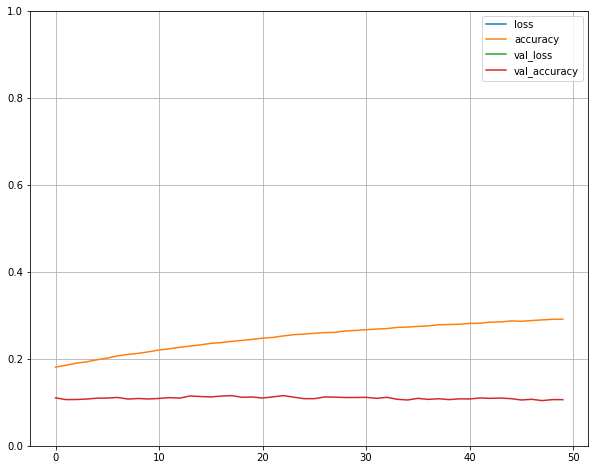

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.save('next_word_model_18:55.h5')
model = load_model('next_word_model_18:55.h5')


# Prediction

In [62]:
def generate_prediction(model,token,enter_text,num_pred):
    #enter_text="for the"   
    input_text,out=enter_text,enter_text
    #num_pred=2
    for i in range(num_pred):
        try:
            encoded=token.texts_to_sequences([input_text])[0]
            encoded=num.array(encoded)
            #print(encoded)
            predict=model.predict(encoded)
            predict=num.argmax(predict)
            #print(predict)
            out_word=''
            for word,index in token.word_index.items():
                if index==predict:
                    out_word=word
                    #print(word)
                    break
            input_text,out=out_word,out +" " + out_word  
            #print(out)
        except Exception as e:
            return " "
    return out            

In [71]:
res=generate_prediction(model,token,"Sherlock Holmes",2)
print(res)

Sherlock Holmes holmes was
